For normal datas run this block

In [137]:
# Import needed libraries
import numpy as np
from numpy import inf
import matplotlib.pyplot as plt
from scipy import stats

In [133]:
# Generate n random numbers with normal distribution
datanumbers = int(input('Enter numbers of random data you want to gerenate: '))
random_number = np.random.normal(0, 1, 1000000)
data = np.random.choice(random_number, datanumbers , replace = False)

Enter numbers of random data you want to gerenate: 1000000


for Autoregressive data run this block.

In [125]:
#read Autoregressive data
data = np.loadtxt('mydataset.txt')

Exercise 4 data

In [147]:
from google.colab import drive
drive.mount('/content/drive')

df = np.loadtxt('/content/drive/MyDrive/data/0-001.txt')

datanumbers = int(input('Enter numbers of random data you want to gerenate: '))
data = df[:datanumbers]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Enter numbers of random data you want to gerenate: 10000


In [148]:
def split_array(array, l):
    # Calculate the number of parts
    num_parts = len(array) // l

    # Split the array into parts of length l
    parts = np.array_split(array, num_parts)

    return parts

# Specify the length of each part
length_of_each_part = 3
errors = []
average_variance = []
l = []
while length_of_each_part <= (int(len(data)/3)-1):
  l.append(length_of_each_part)
  result = split_array(data, length_of_each_part)
  variance = []
  for i in range(len(result)):
    vari = np.var(result[i])
    variance.append(vari)
  av_vari = sum(variance) / len(variance)
  average_variance.append(av_vari)
  variance = np.array(variance)
  error = np.sqrt((np.sum(((variance**(2)) - av_vari)**2)) / (len(variance)*(len(variance)-1)))
  errors.append(error)
  length_of_each_part = length_of_each_part + 1

errors = np.array(errors)
from numpy import inf
errors[errors == inf] = 0

In [149]:
for ele in average_variance:
  if ele == average_variance[-1]:
    n = average_variance.index(ele)
    print('Second Order Stationary Lenght:',l[n])
    break

Second Order Stationary Lenght: 2501


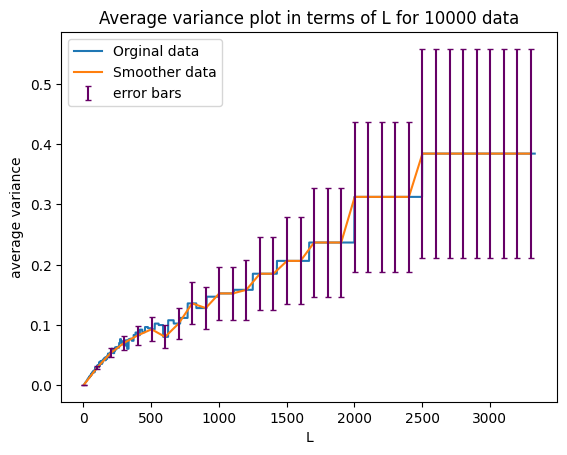

In [152]:
l = np.array(l)
average_variance = np.array(average_variance)
errors = np.array(errors)

plt.plot(l,average_variance, label='Orginal data')

slicenumber = 100
lnew = l[::slicenumber]
errorsnew = errors[::slicenumber]
average_variancenew =average_variance[::slicenumber]

plt.plot(lnew,average_variancenew, label='Smoother data')
plt.errorbar(lnew, average_variancenew, yerr=errorsnew, fmt='none', color='#660066', capsize=2, label='error bars')
plt.legend()
plt.xlabel("L")
plt.ylabel("average variance")
plt.title(f'Average variance plot in terms of L for {datanumbers} data with normal distribution')
plt.show()

In [151]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller


res = adfuller(data)

# Printing the statistical result of the adfuller test
print('Augmneted Dickey_fuller Statistic: %f' % res[0])
print('p-value: %f' % res[1])

# printing the critical values at different alpha levels.
print('critical values at different levels:')
for k, v in res[4].items():
    print('\t%s: %.3f' % (k, v))

Augmneted Dickey_fuller Statistic: -2.133389
p-value: 0.231302
critical values at different levels:
	1%: -3.431
	5%: -2.862
	10%: -2.567
